# Manufacturing Defect Rate Estimation

Imagine you're working in a factory. You want to estimate the true defect rate of a machine producing items.

You've checked 100 items.

You found 7 defective items.

You want to estimate the true defect rate $ \theta $ using Bayesian inference.

In [ ]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Dummy observed data
n_checked = 100
n_defective = 7

# Building the Bayesian model
with pm.Model() as model:
# your code here
    


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


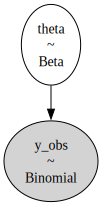

In [ ]:
# visualize the model

!['beta'](./images/beta_distribution.png)

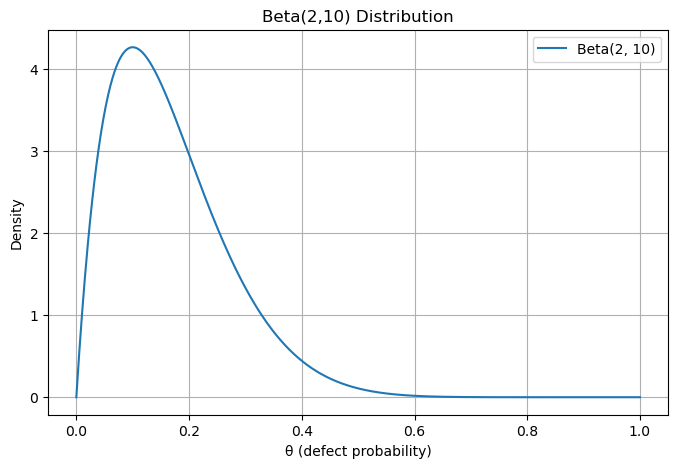

In [ ]:
# draw the beta distribution


In [ ]:
with model:
    # Inference: sample from the posterior


In [ ]:
# Model validation and results
# Trace plot


# Summary statistics

# Effective Sample Size and R-hat (convergence diagnostics)


### Expected results

The posterior for $ \theta $ should be centered somewhere around 7%.

The uncertainty will be visible (maybe 95% HDI from ~3% to ~12%).

Posterior predictive should simulate similar numbers of defects (around 7).

# Modeling Daily Website Visits Based on Marketing Spend

### Problem Statement
A digital marketing team wants to understand how their daily advertising spend influences the number of visits to their website. The number of daily visits is count data (non-negative integers), and the relationship between marketing spend and visits is expected to be nonlinear and multiplicative.

They want to build a Bayesian Poisson regression model to:

Quantify the effect of marketing spend on daily visits.

Estimate uncertainty in the effect size.

Make probabilistic predictions of daily visits given different marketing budgets.

### Synthetic Dataset Generation (Simulating the Problem)



In [1]:
import numpy as np

np.random.seed(42)
n_days = 100000

# Simulate daily marketing spend (in thousands of dollars)
marketing_spend = np.random.normal(5, 2, n_days)  # average spend $5k, std $2k

# True underlying relationship parameters
true_intercept = 0.5
true_beta = 0.3

# Poisson rate (expected visits) increases exponentially with spend
expected_visits = np.exp(true_intercept + true_beta * marketing_spend)

# Simulate daily visits from Poisson distribution
daily_visits = np.random.poisson(lam=expected_visits)



We model the daily visits as Poisson distributed counts with a log-linear relationship to marketing spend:

$$
\text{daily\_visits}_i \sim \text{Poisson}(\lambda_i), \quad \lambda_i = \exp(\alpha + \beta \times \text{marketing\_spend}_i)
$$


α is the intercept (baseline log-rate of visits).

β is the effect of marketing spend on the log-rate of visits.

In [ ]:
import pymc as pm
import arviz as az

with pm.Model() as model:
    # model and inference


In [ ]:
#draw the model

In [ ]:
# print summary


Why Use This Model?

Count data: Poisson regression naturally models counts, unlike linear regression which assumes continuous data.

Nonlinear effect: The log link models multiplicative effects of marketing spend on visits.

Uncertainty quantification: Bayesian inference provides full posterior distributions, allowing for uncertainty estimates and probabilistic predictions.

Scalability: PyMC efficiently handles large datasets with advanced MCMC samplers like NUTS.

# Bayesian Poisson Regression Exercise with PyMC

Problem Setup

You're provided with a numerical dataset representing observed sales volumes influenced by different numerical predictors such as advertising spend, price, and store size. The dataset includes:

Advertising spend (in thousands of dollars)

Product price (in dollars)

Store size (in square feet)

Number of units sold

### Sample Data (example)

Here's an example dataset snippet you can use for demonstration purposes:

In [ ]:
import pandas as pd

data = {
    'Advertising Spend': [20, 30, 40, 50, 60, 70],
    'Product Price': [5, 4.5, 4, 3.5, 3, 2.5],
    'Store Size': [1500, 2000, 2500, 3000, 3500, 4000],
    'Units Sold': [200, 250, 300, 350, 400, 450]
}

df = pd.DataFrame(data)

### Objective

Construct a Bayesian Poisson regression model to estimate the expected number of units sold based on the predictors provided (advertising spend, product price, store size).

In [ ]:
import pymc as pm
import numpy as np

with pm.Model() as poisson_regression:
    # Predictors
    advertising = df['Advertising Spend'].values
    price = df['Product Price'].values
    size = df['Store Size'].values

    # Priors for coefficients
    # your code here 

    # Expected units sold
    # your code here 

    # Likelihood
    # your code here

    # inference

    # model convergency


# Bayesian Hierarchical Modeling Exercise with PyMC

## Problem Setup

You're provided with a large dataset containing the observed number of accidents at multiple traffic intersections across various cities over several years. The dataset includes:

Intersection ID

City

Year

Traffic volume (vehicles/day)

Number of accidents observed

Sample Data (example)

Here's an example dataset snippet you can use for demonstration purposes:

In [7]:
import pandas as pd

data = {
    'Intersection ID': ['A1', 'A2', 'B1', 'B2', 'C1', 'C2'],
    'City': ['CityA', 'CityA', 'CityB', 'CityB', 'CityC', 'CityC'],
    'Year': [2020, 2020, 2021, 2021, 2022, 2022],
    'Traffic volume (vehicles/day)': [1000, 1500, 1200, 1100, 1300, 1250],
    'Number of accidents observed': [5, 7, 6, 4, 8, 5]
}

df = pd.DataFrame(data)

### Objective

Your task is to construct a Bayesian hierarchical Poisson model to estimate the underlying accident rate for each intersection, considering variations across cities and individual intersections. Hierarchical models are ideal here since they allow borrowing of strength across intersections and cities, improving individual estimates especially where data is sparse.

In [8]:
import pymc as pm
import numpy as np

with pm.Model() as hierarchical_model:
    city_idx, cities = pd.factorize(df['City'])
    intersection_idx, intersections = pd.factorize(df['Intersection ID'])

    # Hyperpriors for city-level parameters
    mu_city = pm.Normal('mu_city', mu=0, sigma=1)
    sigma_city = pm.HalfNormal('sigma_city', sigma=1)

    # City-level parameters
    city_effect = pm.Normal('city_effect', mu=mu_city, sigma=sigma_city, shape=len(cities))

    # Intersection-level parameters
    sigma_intersection = pm.HalfNormal('sigma_intersection', sigma=1)
    intersection_effect = pm.Normal('intersection_effect', mu=city_effect[city_idx], sigma=sigma_intersection, shape=len(intersections))

    # Expected accident rate
    traffic_volume = df['Traffic volume (vehicles/day)'].values
    lambda_ = pm.math.exp(intersection_effect[intersection_idx]) * traffic_volume

    # Likelihood
    accidents_observed = df['Number of accidents observed'].values
    accidents = pm.Poisson('accidents', mu=lambda_, observed=accidents_observed)



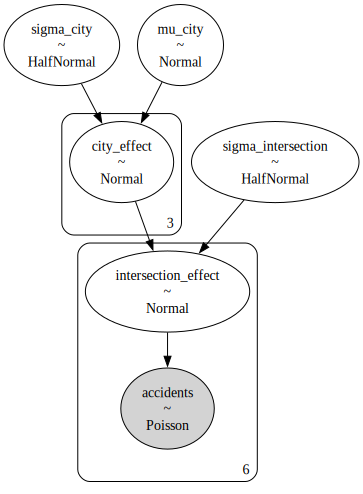

In [10]:
pm.model_to_graphviz(hierarchical_model)

In [14]:
with hierarchical_model:
    trace_hm = pm.sample(2000, tune=1000, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_city, sigma_city, city_effect, sigma_intersection, intersection_effect]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 7 seconds.
There were 148 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


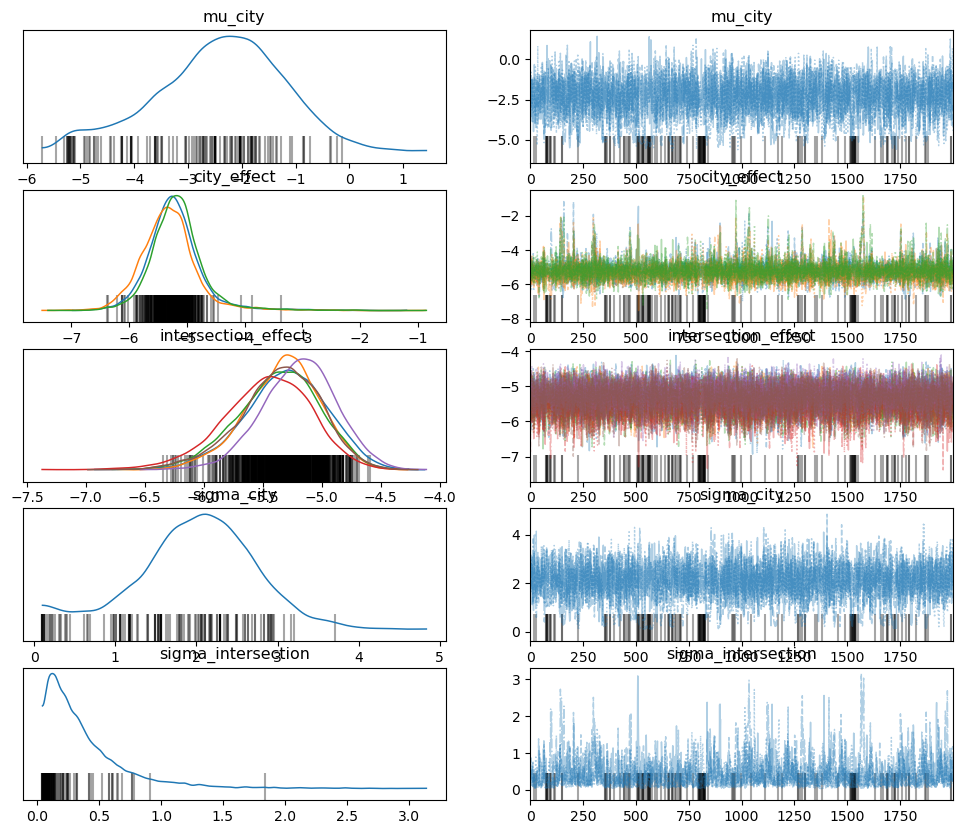

                         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_city                -2.419  1.185    -5.161     -0.428      0.034    0.031   
city_effect[0]         -5.211  0.500    -6.172     -4.260      0.012    0.009   
city_effect[1]         -5.317  0.508    -6.379     -4.425      0.012    0.009   
city_effect[2]         -5.168  0.490    -6.148     -4.282      0.011    0.008   
intersection_effect[0] -5.308  0.356    -6.041     -4.650      0.006    0.004   
intersection_effect[1] -5.335  0.319    -5.988     -4.729      0.005    0.004   
intersection_effect[2] -5.369  0.353    -6.049     -4.692      0.006    0.004   
intersection_effect[3] -5.472  0.380    -6.238     -4.757      0.007    0.005   
intersection_effect[4] -5.191  0.315    -5.823     -4.599      0.004    0.003   
intersection_effect[5] -5.357  0.349    -6.078     -4.700      0.005    0.004   
sigma_city              1.992  0.730     0.206      3.212      0.023    0.016   
sigma_intersection      0.38

Sampling: [accidents]


Output()

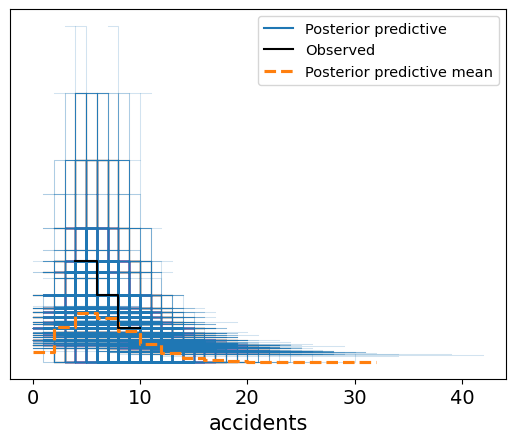

Effective Sample Size (ESS):
<xarray.Dataset> Size: 168B
Dimensions:                    (city_effect_dim_0: 3,
                                intersection_effect_dim_0: 6)
Coordinates:
  * city_effect_dim_0          (city_effect_dim_0) int64 24B 0 1 2
  * intersection_effect_dim_0  (intersection_effect_dim_0) int64 48B 0 1 2 3 4 5
Data variables:
    mu_city                    float64 8B 1.369e+03
    city_effect                (city_effect_dim_0) float64 24B 2.354e+03 ... ...
    intersection_effect        (intersection_effect_dim_0) float64 48B 3.749e...
    sigma_city                 float64 8B 1.056e+03
    sigma_intersection         float64 8B 701.3

R-hat:
<xarray.Dataset> Size: 168B
Dimensions:                    (city_effect_dim_0: 3,
                                intersection_effect_dim_0: 6)
Coordinates:
  * city_effect_dim_0          (city_effect_dim_0) int64 24B 0 1 2
  * intersection_effect_dim_0  (intersection_effect_dim_0) int64 48B 0 1 2 3 4 5
Data variables:
    mu_

In [15]:
# Model validation and results
# Trace plot
az.plot_trace(trace_hm, combined=True);
plt.show()

# Summary statistics
summary = az.summary(trace_hm, hdi_prob=0.95)
print(summary)

# Posterior predictive checks
with hierarchical_model:
    ppc = pm.sample_posterior_predictive(trace_hm, random_seed=42)

az.plot_ppc(ppc)
plt.show()

# Effective Sample Size and R-hat (convergence diagnostics)
ess = az.ess(trace_hm)
rhat = az.rhat(trace_hm)
print("Effective Sample Size (ESS):")
print(ess)
print("\nR-hat:")
print(rhat)